In [ ]:
pip install mplsoccer

In [ ]:
import pandas as pd
from mplsoccer.pitch import Pitch

In [ ]:
df = pd.read_csv('valladolidA.csv')
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

#find passes and then only look for the successful passes
passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

successful = successful[successful['minute'] < firstSub]
pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipient'],downcast='integer')
successful['passer'] = pas
successful['recipient'] = rec
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])
pass_between = pass_between[pass_between['pass_count']>5]

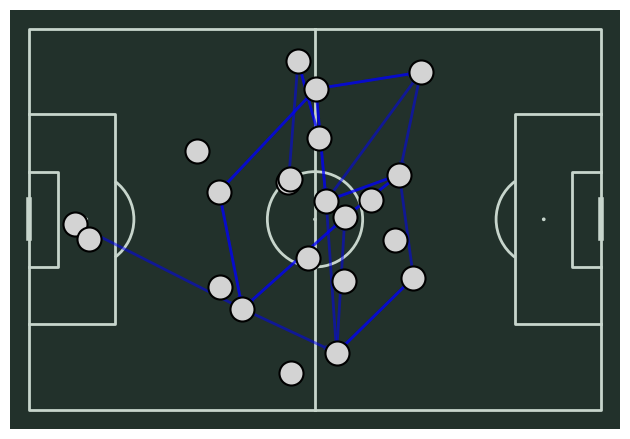

In [ ]:
pitch = Pitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc',
               )
fig, ax = pitch.draw()
arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     width = 2, headwidth = 2, color = 'b', ax = ax, zorder = 1, alpha = .5)

#plot the nodes

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 1.5, alpha = 1, zorder = 1, ax=ax)